Importing modules

In [1]:
#suppressing a warning - UserWarning: Wswiglal-redir-stdio
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal
import lal as _lal

In [2]:
import sys

sys.path.insert(0, "../")
from regular_precession import *
from systems_lib import *
from mismatch_n_SNR import *
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.dpi"] = 200

Redshifting the system (chirp mass and distances)

In [3]:
# Define the default parameters for the system 1
default_precession_params_sys1 = redshifted_new_params(0.3, default_precession_params_sys1)
default_precession_params_sys1_NP = redshifted_new_params(0.3, default_precession_params_sys1_NP)

# Define the default parameters for the system 2
default_precession_params_sys2 = redshifted_new_params(0.3, default_precession_params_sys2)
default_precession_params_sys2_NP = redshifted_new_params(0.3, default_precession_params_sys2_NP)

# Define the default parameters for the system 3
default_precession_params_sys3 = redshifted_new_params(0.3, default_precession_params_sys3)
default_precession_params_sys3_NP = redshifted_new_params(0.3, default_precession_params_sys3_NP)


For system 1

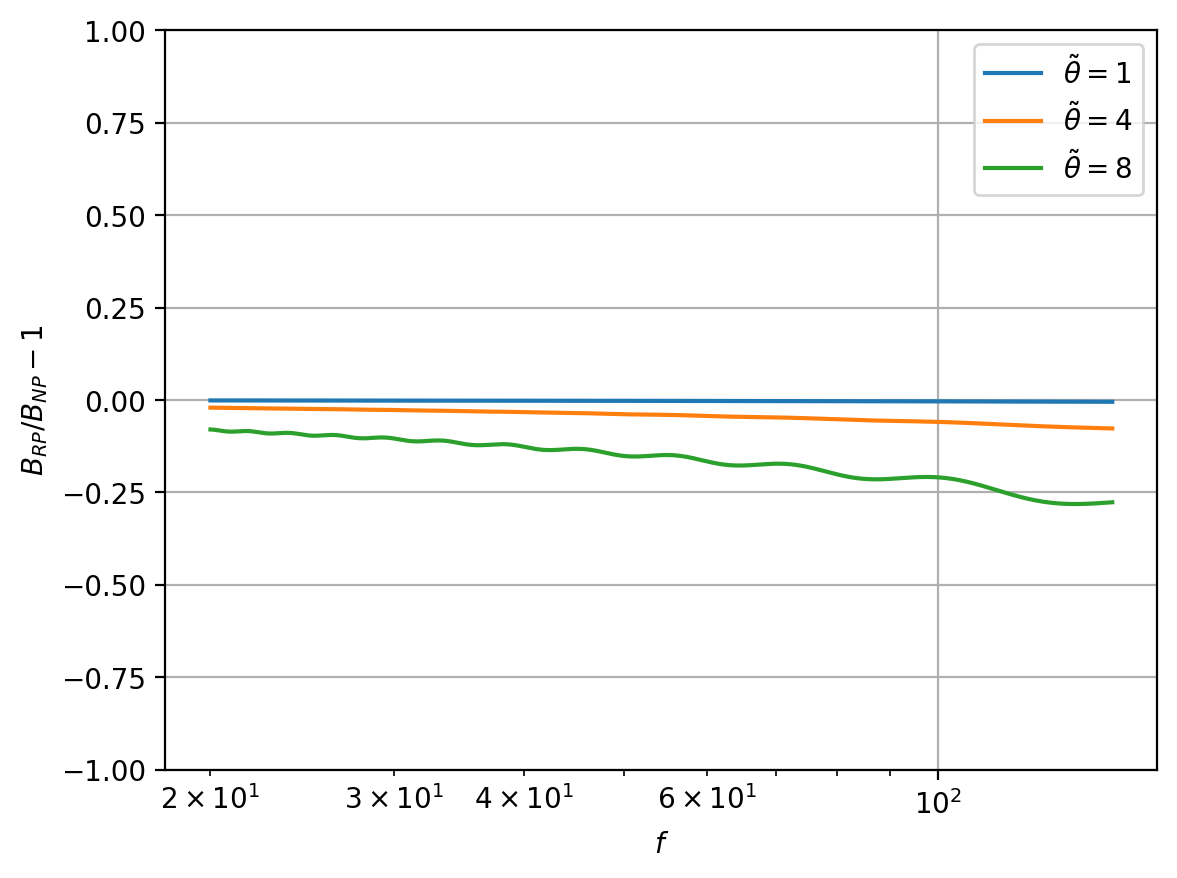

In [4]:
theta_array = np.array([1, 4, 8])

frac_t_1_array = []

for t_i in theta_array:
    default_precession_params_sys1['theta_tilde'] = t_i

    f_cut = Regular_precession(default_precession_params_sys1).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys1)
    precession_initial_NP = Regular_precession(default_precession_params_sys1_NP)

    Amp_RP = precession_initial_RP.amplitude(f_range)
    Amp_NP = precession_initial_NP.amplitude(f_range)
    c_a, s_pa, c_pa = precession_initial_NP.beam_pattern_amplitude_and_phase(f_range)
    
    frac_t_1 = (Amp_RP/Amp_NP) - 1

    frac_t_1_array.append(frac_t_1)
    plt.plot(f_range, frac_t_1, label = r'$\tilde\theta =  {}$'.format(t_i))
    plt.legend()
    plt.xlabel('$f$')
    plt.ylabel(r'$B_{RP}/B_{NP} - 1$')
    plt.grid()
    plt.xscale('log')
    plt.ylim([-1, 1])


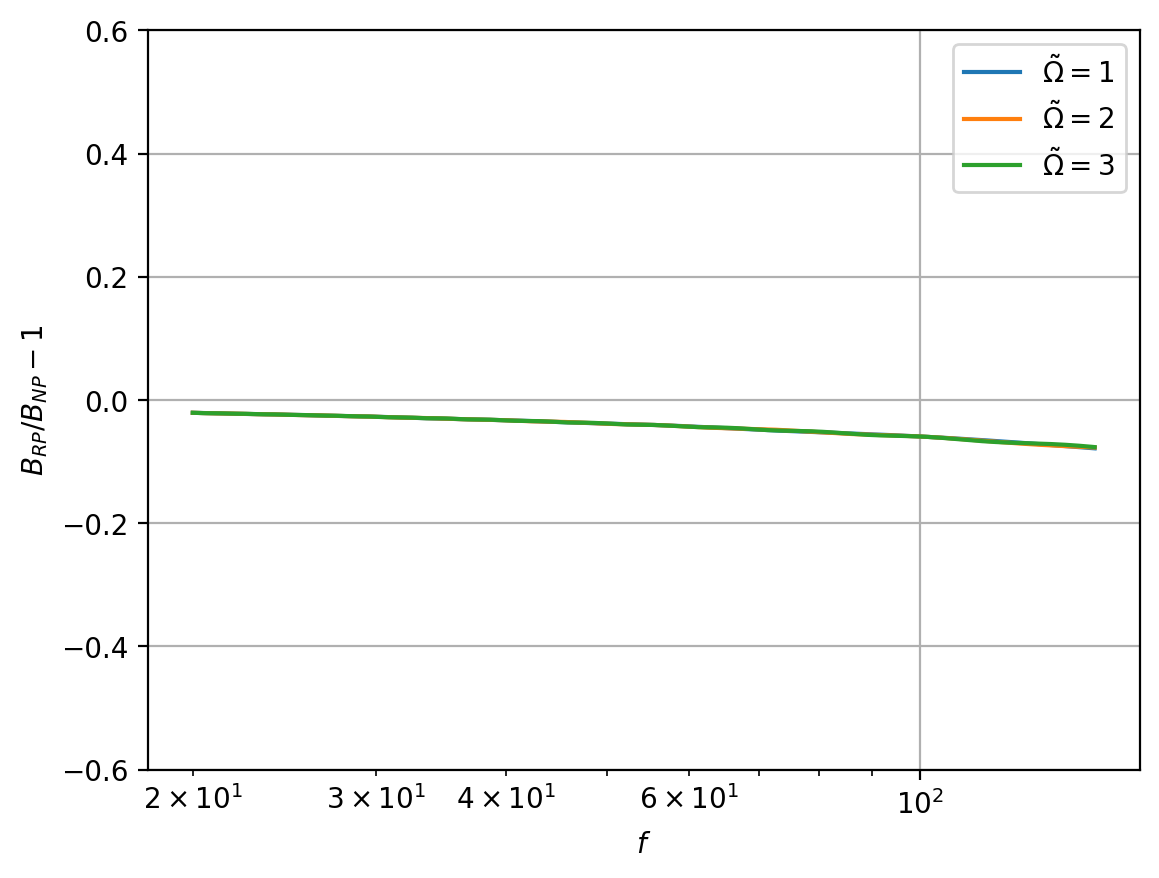

In [5]:
default_precession_params_sys1['theta_tilde'] = 4
omega_array = np.array([1, 2, 3])
frac_o_1_array = []


for o_i in omega_array:
    default_precession_params_sys1['omega_tilde'] = o_i

    f_cut = Regular_precession(default_precession_params_sys1).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys1)
    precession_initial_NP = Regular_precession(default_precession_params_sys1_NP)

    Amp_RP = precession_initial_RP.amplitude(f_range)
    Amp_NP = precession_initial_NP.amplitude(f_range)
    
    frac_o_1 = (Amp_RP/Amp_NP) - 1

    frac_o_1_array.append(frac_o_1)
    
    plt.plot(f_range, frac_o_1, label = r'$\tilde\Omega =  {}$'.format(o_i))
    plt.legend()
    plt.xlabel('$f$')
    plt.ylabel(r'$B_{RP}/B_{NP} - 1$')
    plt.grid()
    plt.xscale('log')
    plt.ylim([-0.6, 0.6])


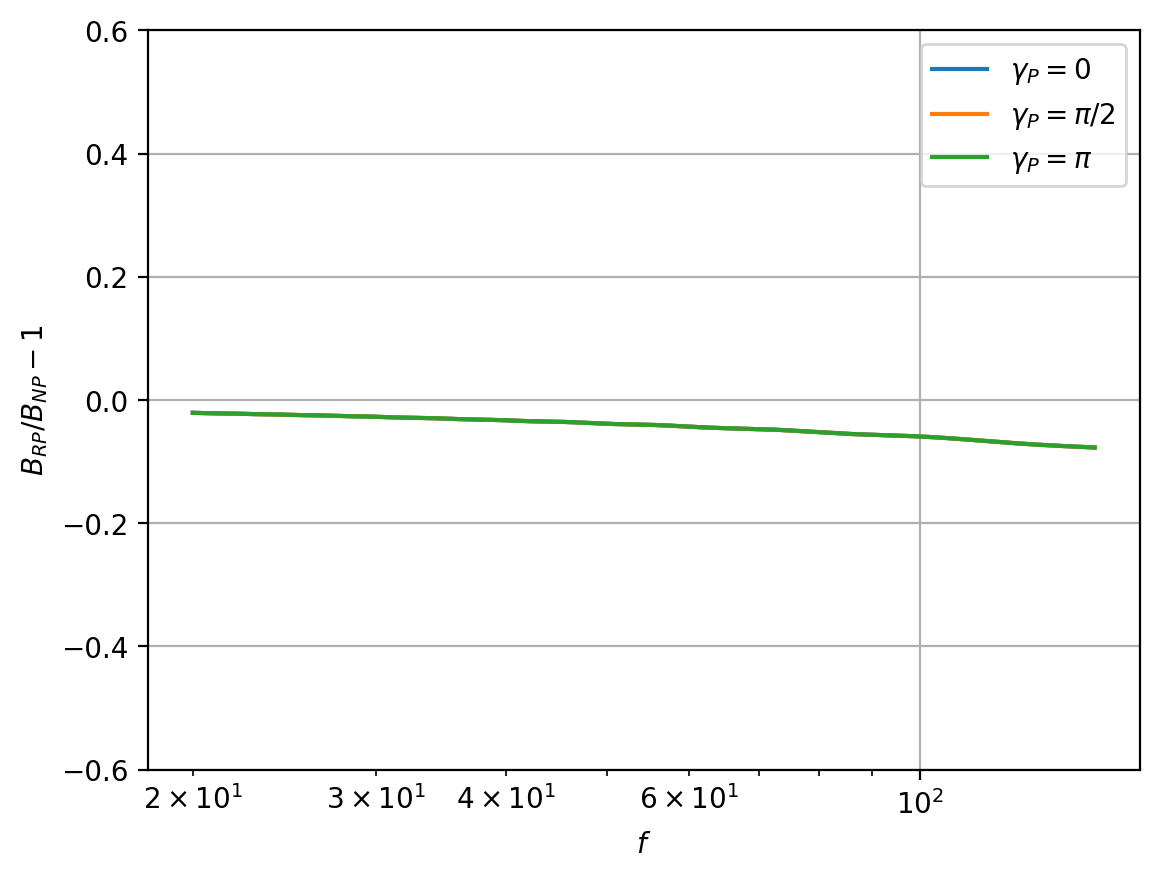

In [6]:
gamma_array = np.array([0, np.pi/2, np.pi])
labels = np.array([r'$\gamma_P = 0$', r'$\gamma_P = \pi/2$', r'$\gamma_P = \pi$'])
default_precession_params_sys1['theta_tilde'] = 4
default_precession_params_sys1['omega_tilde'] = 2

frac_g_1_array = []

it_1 = 0
for g_i in gamma_array:
    default_precession_params_sys1['gamma_P'] = g_i
    
    f_cut = Regular_precession(default_precession_params_sys1).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys1)
    precession_initial_NP = Regular_precession(default_precession_params_sys1_NP)

    Amp_RP = precession_initial_RP.amplitude(f_range)
    Amp_NP = precession_initial_NP.amplitude(f_range)
    
    frac_g_1 = (Amp_RP/Amp_NP) - 1
    
    frac_g_1_array.append(frac_g_1)

    plt.plot(f_range, frac_g_1, label = labels[it_1])
    plt.legend()
    plt.xlabel('$f$')
    plt.ylabel(r'$B_{RP}/B_{NP} - 1$')
    plt.grid()
    plt.xscale('log')
    plt.ylim([-0.6, 0.6])
    it_1 += 1

For system 2

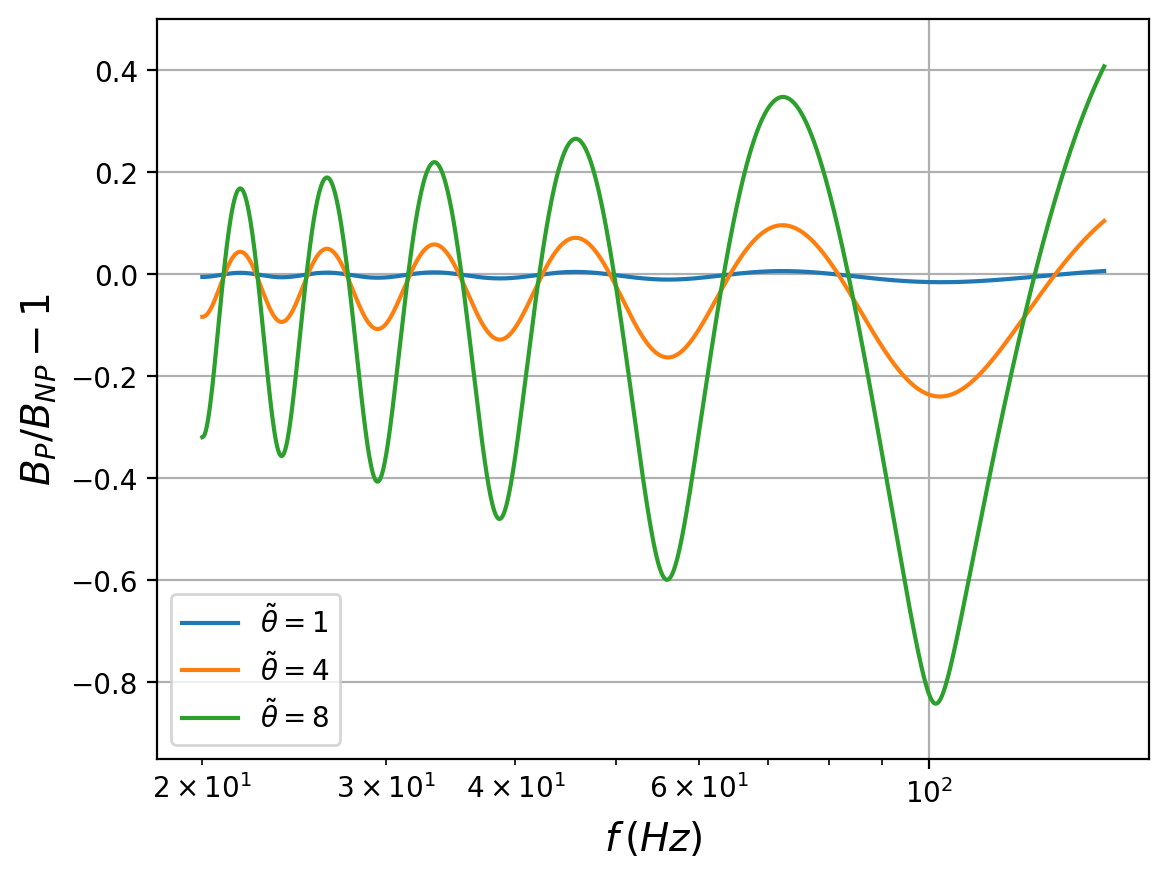

In [7]:
theta_array = np.array([1, 4, 8])
default_precession_params_sys2['omega_tilde'] = 2

frac_t_2_array = []

label_array = [r'$\tilde{\theta} = 1$', r'$\tilde{\theta} = 4$', r'$\tilde{\theta} = 8$']
iter1 = 0

for t_i in theta_array:
    default_precession_params_sys2['theta_tilde'] = t_i

    f_cut = Regular_precession(default_precession_params_sys2).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys2)
    precession_initial_NP = Regular_precession(default_precession_params_sys2_NP)

    Amp_RP = precession_initial_RP.amplitude(f_range)
    Amp_NP = precession_initial_NP.amplitude(f_range)
    
    frac_t_2 = (Amp_RP/Amp_NP) - 1
    
    frac_t_2_array.append(frac_t_2)

    plt.plot(f_range, frac_t_2, label = label_array[iter1])
    plt.legend()
    plt.xlabel('$f\,(Hz)$', fontsize = 14)
    plt.xscale('log')
    plt.ylim([-0.95, 0.5])
    plt.ylabel(r'$B_{P}/B_{NP} - 1$', fontsize = 14)
    plt.grid('true')
    iter1 += 1


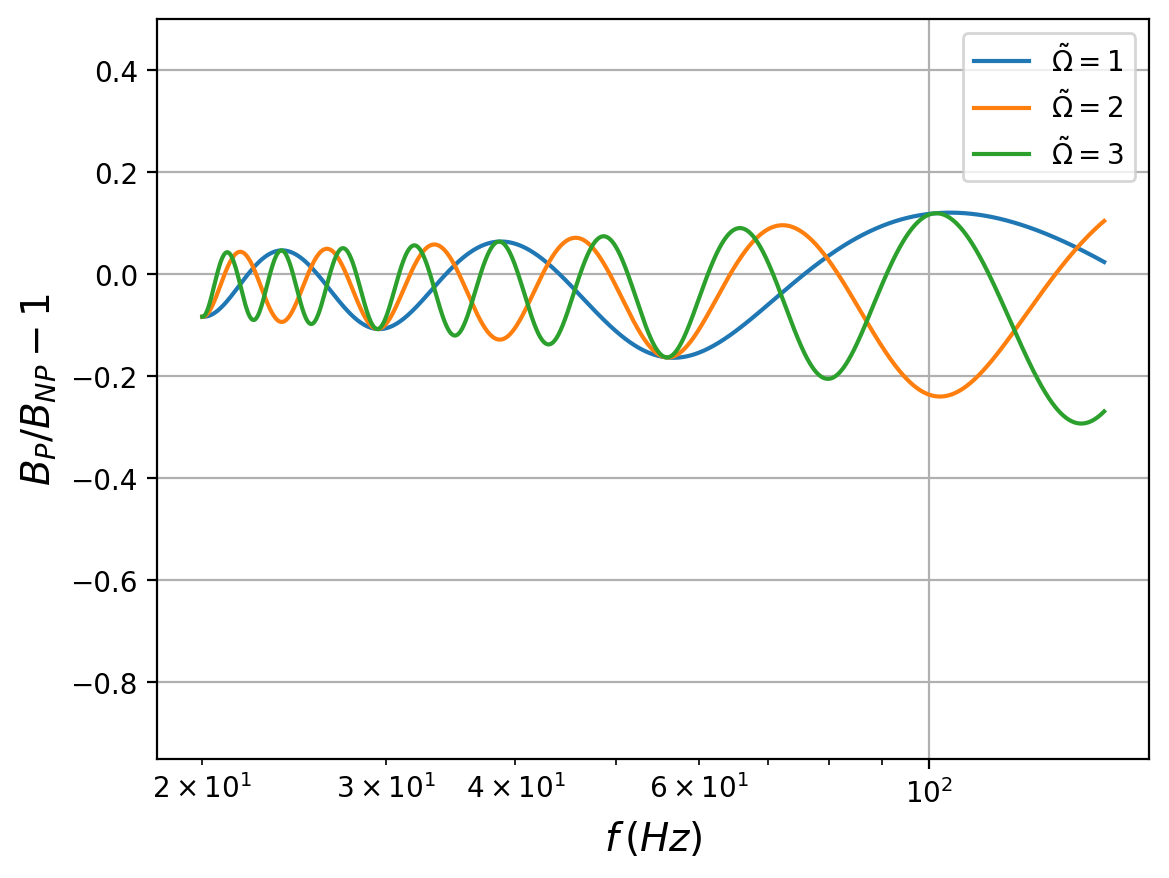

In [8]:
omega_array = np.array([1, 2, 3])
default_precession_params_sys2['theta_tilde'] = 4

frac_o_2_array = []

label_array = [r'$\tilde{\Omega} = 1$', r'$\tilde{\Omega} = 2$', r'$\tilde{\Omega} = 3$']
iter1 = 0

for o_i in omega_array:
    default_precession_params_sys2['omega_tilde'] = o_i

    f_cut = Regular_precession(default_precession_params_sys2).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys2)
    precession_initial_NP = Regular_precession(default_precession_params_sys2_NP)

    Amp_RP = precession_initial_RP.amplitude(f_range)
    Amp_NP = precession_initial_NP.amplitude(f_range)
    
    frac_o_2 = (Amp_RP/Amp_NP) - 1
    
    frac_o_2_array.append(frac_o_2)

    plt.plot(f_range, frac_o_2, label = label_array[iter1])
    plt.legend()
    plt.xlabel('$f\, (Hz)$', fontsize = 14)
    plt.ylabel(r'$B_{P}/B_{NP} - 1$', fontsize = 14)
    plt.ylim([-0.95, 0.5])
    plt.grid('true')
    plt.xscale('log')
    iter1 += 1


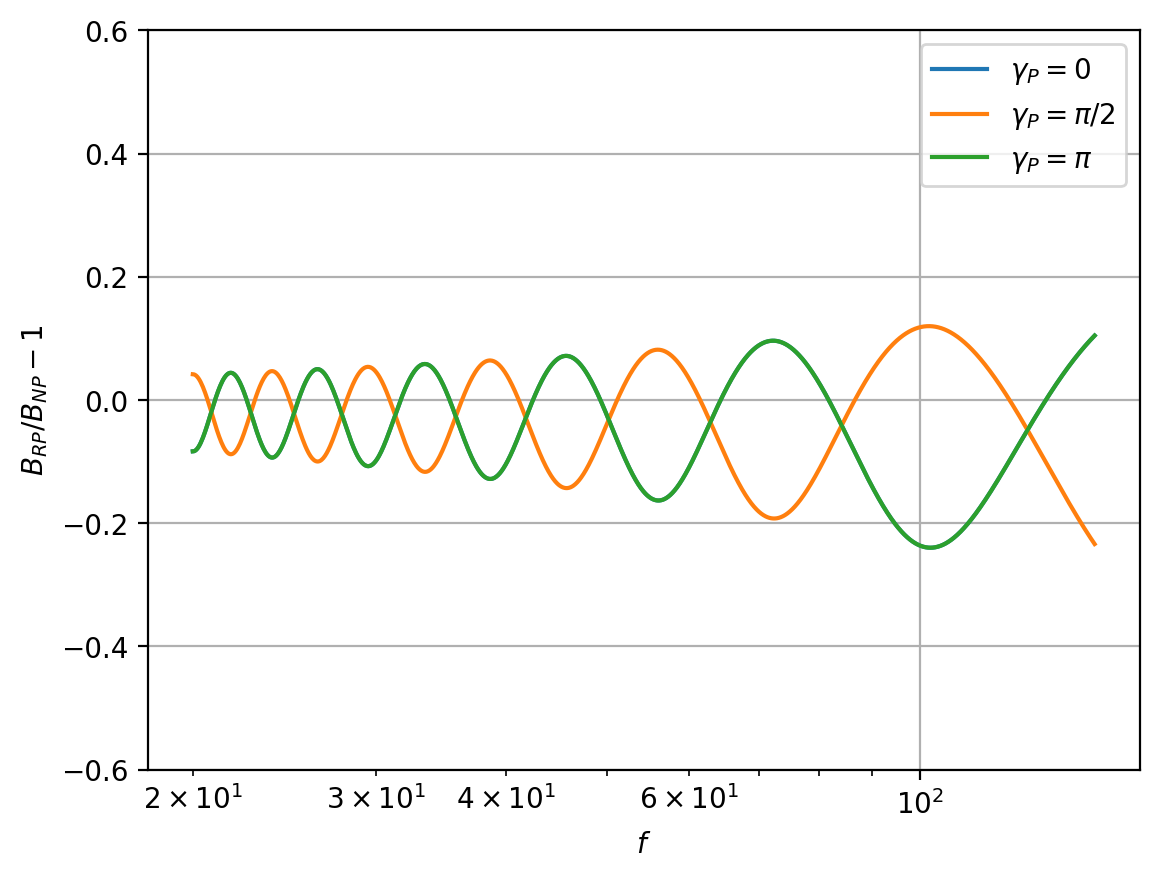

In [9]:
gamma_array = np.array([0, np.pi/2, np.pi])
labels = np.array([r'$\gamma_P = 0$', r'$\gamma_P = \pi/2$', r'$\gamma_P = \pi$'])
default_precession_params_sys2['theta_tilde'] = 4
default_precession_params_sys2['omega_tilde'] = 2

frac_g_2_array = []

it_1 = 0
for g_i in gamma_array:
    default_precession_params_sys2['gamma_P'] = g_i
    
    f_cut = Regular_precession(default_precession_params_sys2).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys2)
    precession_initial_NP = Regular_precession(default_precession_params_sys2_NP)

    Amp_RP = precession_initial_RP.amplitude(f_range)
    Amp_NP = precession_initial_NP.amplitude(f_range)
    
    frac_g_2 = (Amp_RP/Amp_NP) - 1
    
    frac_g_2_array.append(frac_g_2)

    plt.plot(f_range, frac_g_2, label = labels[it_1])
    plt.legend()
    plt.xlabel('$f$')
    plt.ylabel(r'$B_{RP}/B_{NP} - 1$')
    plt.grid()
    plt.xscale('log')
    plt.ylim([-0.6, 0.6])
    it_1 += 1

For system 3

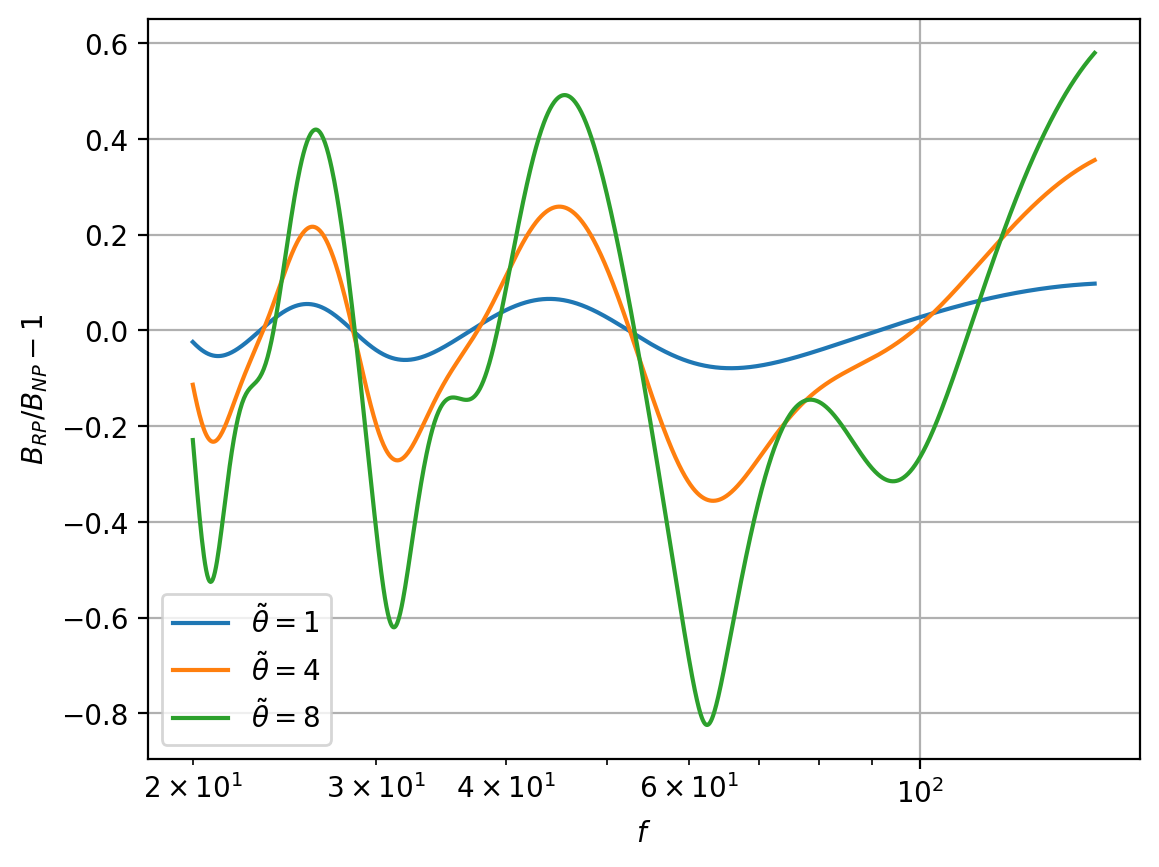

In [10]:
theta_array = np.array([1, 4, 8])
default_precession_params_sys3['omega_tilde'] = 2

frac_t_3_array = []

for t_i in theta_array:
    default_precession_params_sys3['theta_tilde'] = t_i

    f_cut = Regular_precession(default_precession_params_sys3).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys3)
    precession_initial_NP = Regular_precession(default_precession_params_sys3_NP)

    Amp_RP = precession_initial_RP.amplitude(f_range)
    Amp_NP = precession_initial_NP.amplitude(f_range)
    
    frac_t_3 = (Amp_RP/Amp_NP) - 1
    
    frac_t_3_array.append(frac_t_3)

    plt.plot(f_range, frac_t_3, label = r'$\tilde\theta =  {}$'.format(t_i))
    plt.legend()
    plt.xlabel('$f$')
    plt.xscale('log')
    plt.ylabel(r'$B_{RP}/B_{NP} - 1$')
    plt.grid()


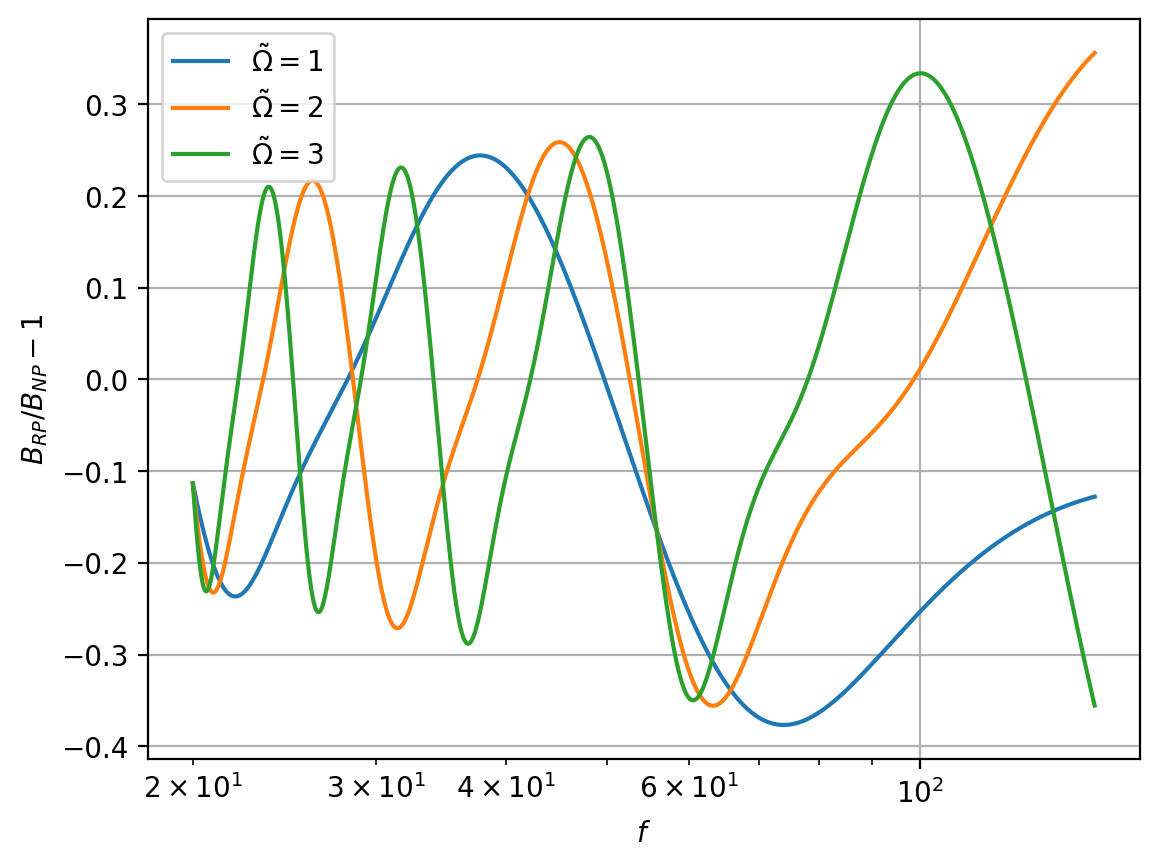

In [11]:
omega_array = np.array([1, 2, 3])
default_precession_params_sys3['theta_tilde'] = 4

frac_o_3_array = []

for o_i in omega_array:
    default_precession_params_sys3['omega_tilde'] = o_i

    f_cut = Regular_precession(default_precession_params_sys3).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys3)
    precession_initial_NP = Regular_precession(default_precession_params_sys3_NP)

    Amp_RP = precession_initial_RP.amplitude(f_range)
    Amp_NP = precession_initial_NP.amplitude(f_range)
    
    frac_o_3 = (Amp_RP/Amp_NP) - 1
    
    frac_o_3_array.append(frac_o_3)

    plt.plot(f_range, frac_o_3, label = r'$\tilde\Omega =  {}$'.format(o_i))
    plt.legend()
    plt.xlabel('$f$')
    plt.ylabel(r'$B_{RP}/B_{NP} - 1$')
    plt.grid()
    plt.xscale('log')


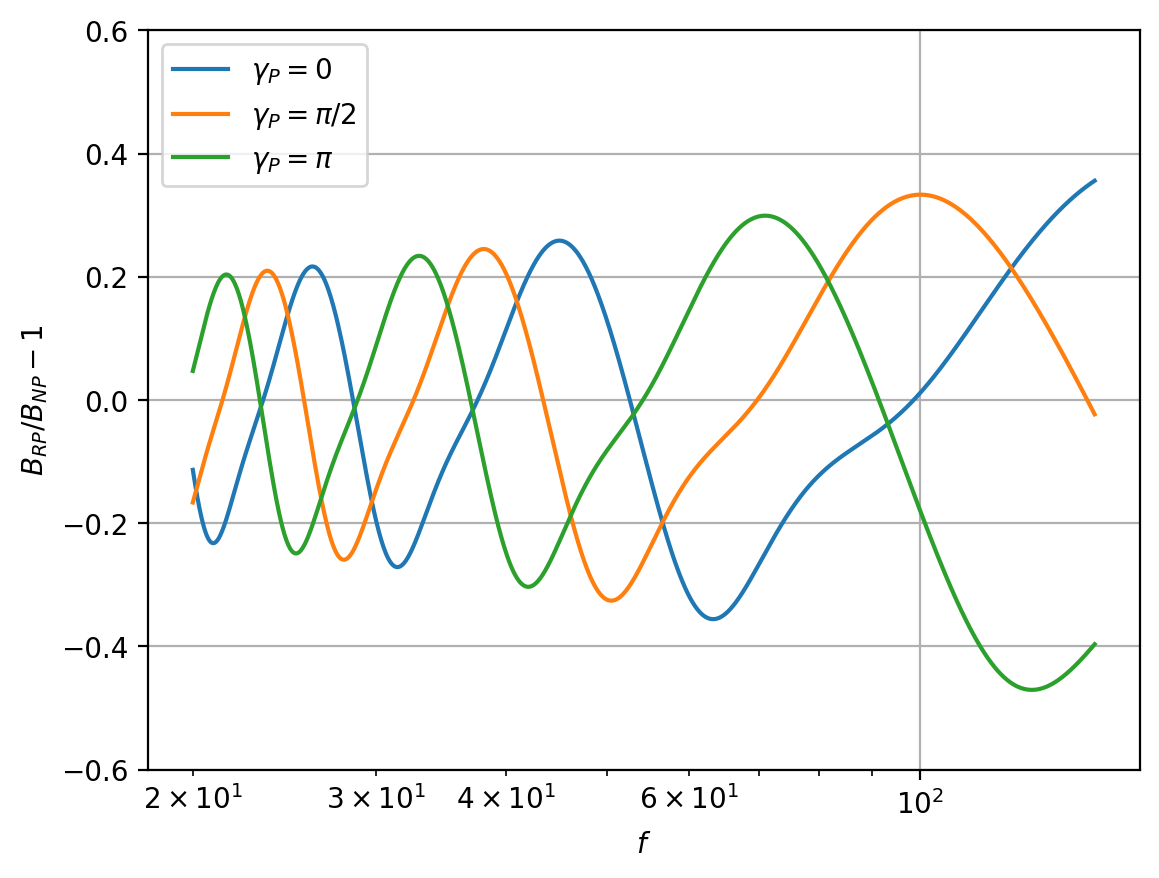

In [12]:
gamma_array = np.array([0, np.pi/2, np.pi])
labels = np.array([r'$\gamma_P = 0$', r'$\gamma_P = \pi/2$', r'$\gamma_P = \pi$'])
default_precession_params_sys3['theta_tilde'] = 4
default_precession_params_sys3['omega_tilde'] = 2

frac_g_3_array = []

it_1 = 0
for g_i in gamma_array:
    default_precession_params_sys3['gamma_P'] = g_i
    
    f_cut = Regular_precession(default_precession_params_sys3).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial_RP = Regular_precession(default_precession_params_sys3)
    precession_initial_NP = Regular_precession(default_precession_params_sys3_NP)

    Amp_RP = precession_initial_RP.amplitude(f_range)
    Amp_NP = precession_initial_NP.amplitude(f_range)
    
    frac_g_3 = (Amp_RP/Amp_NP) - 1
    
    frac_g_3_array.append(frac_g_3)

    plt.plot(f_range, frac_g_3, label = labels[it_1])
    plt.legend()
    plt.xlabel('$f$')
    plt.ylabel(r'$B_{RP}/B_{NP} - 1$')
    plt.grid()
    plt.xscale('log')
    plt.ylim([-0.6, 0.6])
    it_1 += 1

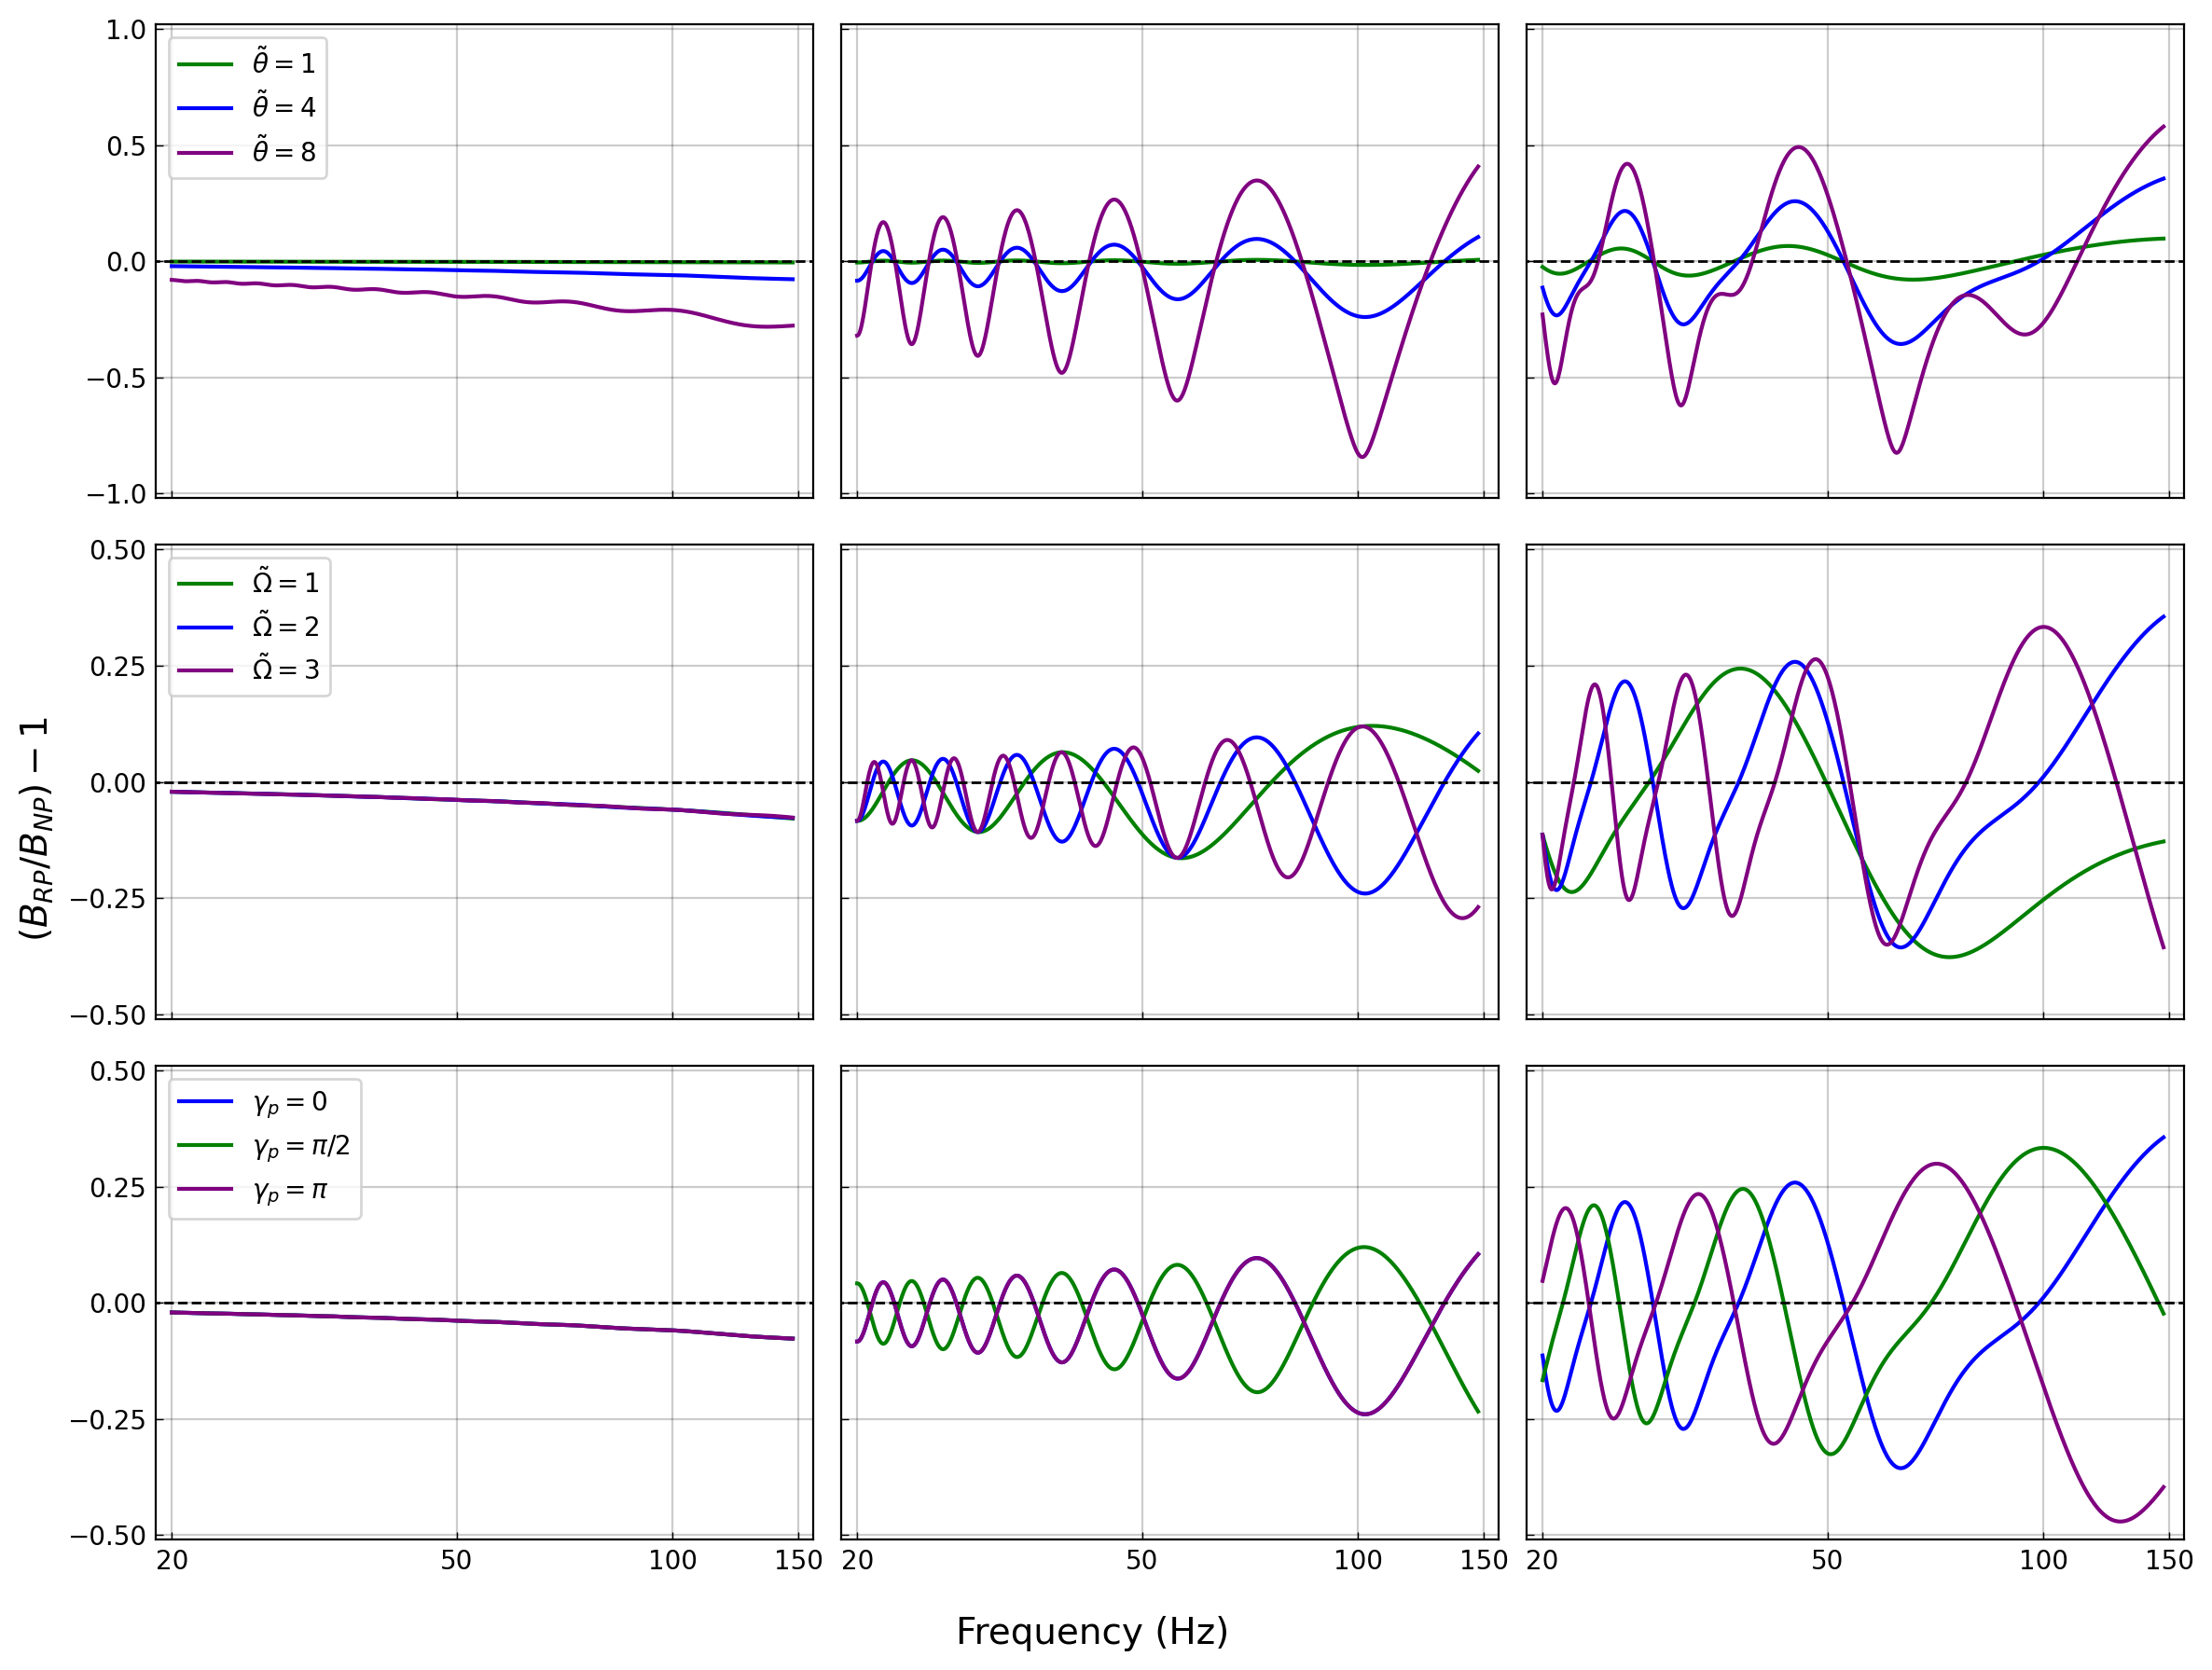

In [13]:
fig_size=[12,9]
fig,ax = plt.subplots(3,3,sharex=True, sharey='row',figsize=fig_size)

#system 1 theta_tilde
ax[0,0].plot(f_range, frac_t_1_array[0],color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[0,0].plot(f_range, frac_t_1_array[1],color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[0,0].plot(f_range, frac_t_1_array[2],color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')
ax[0,0].hlines(y=0,  xmin=10, xmax=220 ,  linewidth = 1,linestyle='--',color='black')
ax[0,0].legend(shadow=False, fancybox=True,loc = 2,prop={'size': 10})
ax[0,0].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[0,0].grid()
ax[0,0].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)

#sytem 2
ax[0,1].plot(f_range, frac_t_2_array[0],color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[0,1].plot(f_range, frac_t_2_array[1],color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[0,1].plot(f_range, frac_t_2_array[2],color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')
ax[0,1].hlines(y=0,  xmin=10, xmax=220 ,  linewidth = 1,linestyle='--',color='black')
ax[0,1].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[0,1].grid()
ax[0,1].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)

#system 3
ax[0,2].plot(f_range, frac_t_3_array[0],color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[0,2].plot(f_range, frac_t_3_array[1],color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[0,2].plot(f_range, frac_t_3_array[2],color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')
ax[0,2].hlines(y=0,  xmin=10, xmax=220 ,  linewidth = 1,linestyle='--',color='black')
ax[0,2].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[0,2].grid()
ax[0,2].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)


#system 1 omega_tilde
ax[1,0].plot(f_range, frac_o_1_array[0],color = 'g',label=r'$\tilde{\Omega}=1$')#,\tilde{\Omega}=2$')
ax[1,0].plot(f_range, frac_o_1_array[1],color = 'b',label=r'$\tilde{\Omega}=2$')#,\tilde{\Omega}=2$')
ax[1,0].plot(f_range, frac_o_1_array[2],color = 'purple',label=r'$\tilde{\Omega}=3$')#, \tilde{\Omega}=2$')
ax[1,0].hlines(y=0,  xmin=10, xmax=220 ,  linewidth = 1,linestyle='--',color='black')
ax[1,0].legend(shadow=False, fancybox=True,loc = 2,prop={'size': 10})
ax[1,0].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[1,0].grid()
ax[1,0].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)

#system 2
ax[1,1].plot(f_range, frac_o_2_array[0],color = 'g',label=r'$\tilde{\Omega}=1$')
ax[1,1].plot(f_range, frac_o_2_array[1],color = 'b',label=r'$\tilde{\Omega}=2$')
ax[1,1].plot(f_range, frac_o_2_array[2],color = 'purple',label=r'$\tilde{\Omega}=3$')
ax[1,1].hlines(y=0,  xmin=10, xmax=220 ,  linewidth = 1,linestyle='--',color='black')
ax[1,1].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[1,1].grid()
ax[1,1].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)

#system 3
ax[1,2].plot(f_range, frac_o_3_array[0],color = 'g',label=r'$\tilde{\Omega}=1$')#,\tilde{\Omega}=2$')
ax[1,2].plot(f_range, frac_o_3_array[1],color = 'b',label=r'$\tilde{\Omega}=2$')#,\tilde{\Omega}=2$')
ax[1,2].plot(f_range, frac_o_3_array[2],color = 'purple',label=r'$\tilde{\Omega}=3$')#, \tilde{\Omega}=2$')
ax[1,2].hlines(y=0,  xmin=10, xmax=220 ,  linewidth = 1,linestyle='--',color='black')
ax[1,2].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[1,2].grid()
ax[1,2].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)


#system 1 gamma_p
ax[2,0].plot(f_range, frac_g_1_array[0],color = 'b',label=r'$\gamma_p = 0$')
ax[2,0].plot(f_range, frac_g_1_array[1],color = 'g',label=r'$\gamma_p = \pi/2$')
ax[2,0].plot(f_range, frac_g_1_array[2],color = 'purple',label=r'$\gamma_p = \pi$')
ax[2,0].hlines(y=0,  xmin=10, xmax=220 ,  linewidth = 1,linestyle='--',color='black')
ax[2,0].legend(shadow=False, fancybox=True,loc = 2, prop={'size': 10})
ax[2,0].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[2,0].grid()
ax[2,0].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)

#system 2
ax[2,1].plot(f_range, frac_g_2_array[0],color = 'b',label=r'$\gamma_p = 0$')
ax[2,1].plot(f_range, frac_g_2_array[1],color = 'g',label=r'$\gamma_p = \pi/2$')
ax[2,1].plot(f_range, frac_g_2_array[2],color = 'purple',label=r'$\gamma_p = \pi$')
ax[2,1].hlines(y=0,  xmin=10, xmax=220 ,  linewidth = 1,linestyle='--',color='black')
ax[2,1].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[2,1].grid()
ax[2,1].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)

#system 3
ax[2,2].plot(f_range, frac_g_3_array[0],color = 'b',label=r'$\gamma_p = 0$')
ax[2,2].plot(f_range, frac_g_3_array[1],color = 'g',label=r'$\gamma_p = \pi/2$')
ax[2,2].plot(f_range, frac_g_3_array[2],color = 'purple',label=r'$\gamma_p = \pi$')
ax[2,2].hlines(y=0,  xmin=10, xmax=220 ,  linewidth = 1,linestyle='--',color='black')
ax[2,2].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[2,2].grid()
ax[2,2].tick_params(axis='x', which='minor', bottom=False, labelbottom = False)

plt.setp(ax[0,:], xticks=[20,50,100,150], yticks = [-1,-0.5,0,0.5,1])
plt.setp(ax[1,:], xticks=[20,50,100,150], yticks = [-0.5,-0.25,0,0.25,0.5])
plt.setp(ax[2,:], xticks=[20,50,100,150], yticks = [-0.5,-0.25,0,0.25,0.5])

fig.supylabel(r'$\left(B_{RP}/B_{NP}\right)-1$', fontsize = 14)
fig.supxlabel(r'Frequency (Hz)', fontsize = 14)

plt.setp(ax[0,:],ylim= [-1.02,1.02])
plt.setp(ax[1,:],ylim= [-0.51,0.51])
plt.setp(ax[2,:],ylim= [-0.51,0.51])

plt.xlim(19, f_cut+10)
ax[0,0].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)

plt.xscale('log')
plt.grid('true')
#pp.legend()
plt.tight_layout()

xticks=[20, 50, 100, 150]
plt.xticks(xticks, [format(tick, '.0f') for tick in xticks])
#plt.show()

fig = plt.gcf()
fig.savefig('figs/amplitudes_all_sys.pdf', format='pdf')


